In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
subh = np.loadtxt('../_data/subhalos.dat')

halo_mask, = np.where((subh[:,15]==0) & (subh[:,16]==0))

subh_name = subh[:,0][halo_mask]
subh_ind  = np.int_(subh_name)
# nsubh = len(subh_name)

print(subh_ind)

[ 0  1  3  4  5  6  7  9 20 21 22 27 28 31 33 35 36 37 38 39 41 42 45 46
 49 50 51 53 54 64 65 66 69 73 74 79 84 85 87 88 90 91 92 95 96]


In [40]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as time
import bines2 as bines

path = '/z/omarioni/gradients/_simulations/snap_127/'

# for j in subh_ind[:1]:
    
#     print (j)
j=0
snap = h5py.File(path + 'subhalo_'+str('%03d'%j)+'.h5py', 'r')

aexp = snap['/Time'][()]
h    = snap['/h'][()]
Om_L = snap['/Omega_Lambda'][()]
Om_M = snap['/Omega_0'][()]
R200 = snap['/R200'][()]

pstr = snap['/Str/Coordinates'][()]
mstr = snap['/Str/Masses'][()]
vstr = snap['/Str/Velocities'][()]

pot  = snap['/Str/Potential'][()]
sft  = snap['/Str/FormationTime'][()]

# aa,  = np.where(sft>0)
# age  = time.conv2(sft[aa], h, Om_L, Om_M)
# # print (len(age))
# age  = np.nanmax(age) - age
# print (len(age))
# age_ = time.conv2(sft, h, Om_L, Om_M)
# aa   = ~np.isnan(age_)
# age_ = age_[aa]
# age  = np.nanmax(age_) - age_

xstr = pstr[:,0]*aexp/h
ystr = pstr[:,1]*aexp/h
zstr = pstr[:,2]*aexp/h
rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

v_x = vstr[:,0] *np.sqrt(aexp)
v_y = vstr[:,1] *np.sqrt(aexp)
v_z = vstr[:,2] *np.sqrt(aexp)

#----------------------masas----------------------------
mstr = mstr/h
pot  = pot/aexp

veloc,=np.where(rstr < 3)

#----------componentes de la velocidad del centro de masa------------
vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

vx = v_x - vxcm
vy = v_y - vycm
vz = v_z - vzcm

e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,5)

xn  = e1x*xstr + e1y*ystr + e1z*zstr
yn  = e2x*xstr + e2y*ystr + e2z*zstr
zn  = e3x*xstr + e3y*ystr + e3z*zstr
vxn = e1x*vx + e1y*vy + e1z*vz
vyn = e2x*vx + e2y*vy + e2z*vz
vzn = e3x*vx + e3y*vy + e3z*vz


rn = np.sqrt(xn**2+yn**2+zn**2)

limit, = np.where(rn < R200)
aa,  = np.where(sft[limit]>0)

limit2,=np.where(rn[aa]<R200*0.15)

Jz = xn[limit][aa][limit2]*vyn[limit][aa][limit2] - yn[limit][aa][limit2]*vxn[limit][aa][limit2]

K = 0.5*(vxn[limit][aa][limit2]**2 + vyn[limit][aa][limit2]**2 + vzn[limit][aa][limit2]**2)

#     En = K[aa1] + pot[limit2][aa1]    
En = K + pot[limit][aa][limit2]

In [22]:
print(pot[limit])

[-482837.66 -482386.2  -482819.78 ... -141497.31 -139456.64 -145050.03]


In [43]:
print(len(En))

4981050


In [27]:
print (len(aa))

5807065


In [25]:
print(len(aa))

5882020


In [5]:
print (len(sft[limit2][aa1]),len(sft[aa][limit]))

5718162 5718162


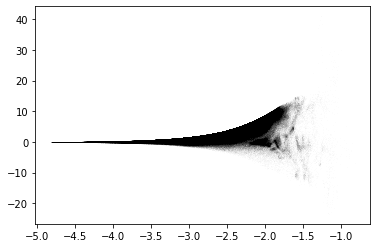

In [41]:
import matplotlib.pyplot as plt
plt.plot(En/1e5,Jz/1e3,'.k',markersize=0.01)

In [42]:
str_pot = np.loadtxt('../_data/potencial_str.dat')
pot_str = str_pot[:,1]

In [45]:
print(len(pot_str[aa][limit2]))

4981050


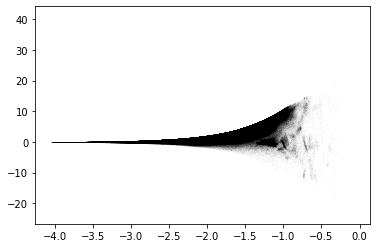

In [46]:
En2 = K - pot_str[aa][limit2]/1e10

import matplotlib.pyplot as plt
plt.plot(En2/1e5,Jz/1e3,'.k',markersize=0.01)

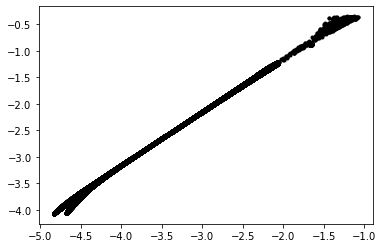

In [47]:
plt.plot(pot[limit][aa][limit2]/1e5,-pot_str[aa][limit2]/(1e15),'.k')